In [1]:
import pickle
file_path = "predictor.pkl"

# Load the serialized outputs object from your local path
with open(file_path, 'rb') as f:
    predictor1 = pickle.load(f)

In [3]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [5]:
print(np.__version__)

1.26.4


In [ ]:
im_path = r"C:\Users\Ramcharan\Downloads\litzchill.jpg"
im = cv2.imread(im_path)
#print(im)
# Convert BGR to RGB if necessary
im_rgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
print(f"Image shape after BGR to RGB conversion: {im_rgb.shape}")

plt.imshow(im_rgb)
plt.show()


Image shape after BGR to RGB conversion: (194, 259, 3)


In [8]:
outputs = predictor1(im_rgb)

e:\litzchill\object_extraction\lib\site-packages\torch\functional.py:512: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ..\aten\src\ATen\native\TensorShape.cpp:3588.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [9]:
def obj_exc(input_image,cropped_images):


  # We can use `Visualizer` to draw the predictions on the image.
  #v = Visualizer(input_image[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
  #out = v.draw_instance_predictions(outputs["instances"].to("cpu"))

  num_instances = len(outputs["instances"])
  for i in range(num_instances):
      # Extract predicted bounding boxes
      pred_boxes = outputs["instances"][i].pred_boxes.tensor.cpu().numpy()
      # Draw bounding boxes on the image
      for box in pred_boxes:
          xmin, ymin, xmax, ymax = box
          #cv2.rectangle(input_image, (int(xmin), int(ymin)), (int(xmax), int(ymax)), (0, 255, 0), 2)

          # Crop the image within the bounding box
          cropped_img = input_image[int(ymin):int(ymax), int(xmin):int(xmax)]
          # Append cropped image to the list
          cropped_images.append(cropped_img)
cropped_images = []
obj_exc(im_rgb,cropped_images)

7


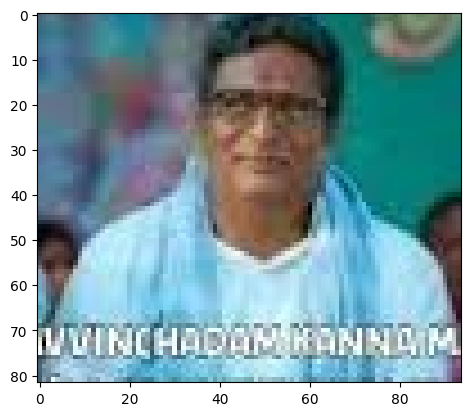

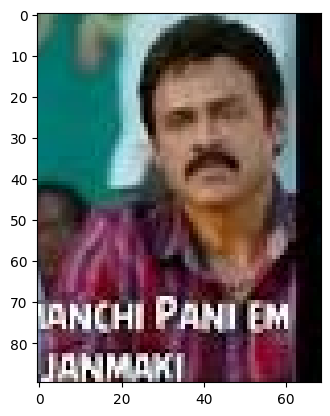

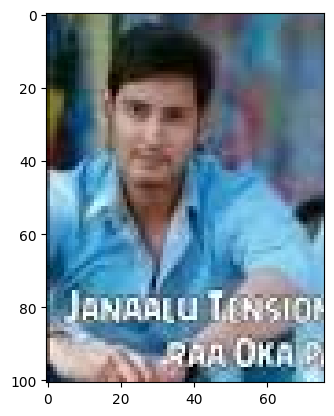

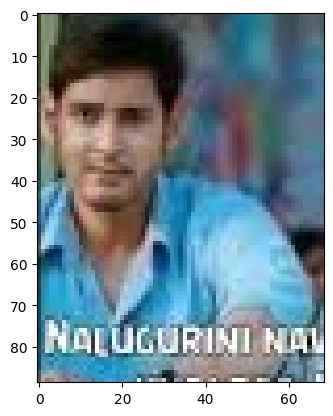

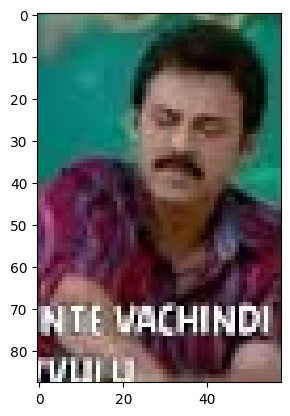

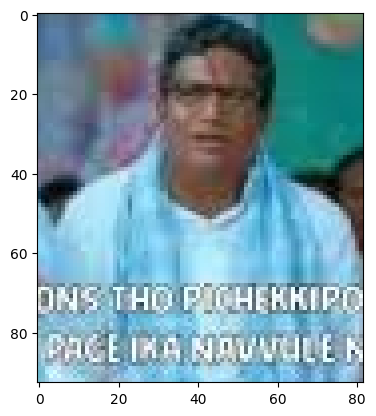

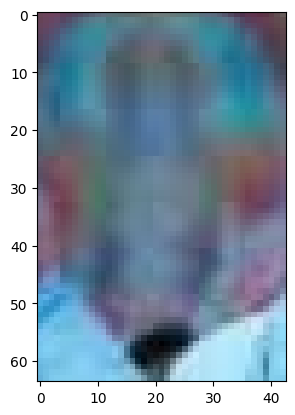

In [10]:
num_images = len(cropped_images)
#fig, axs = plt.subplots(1, num_images, figsize=(10, 10))
print(num_images)
for i in range(num_images):
    plt.imshow(cropped_images[i])
    #print()
    plt.show()


7


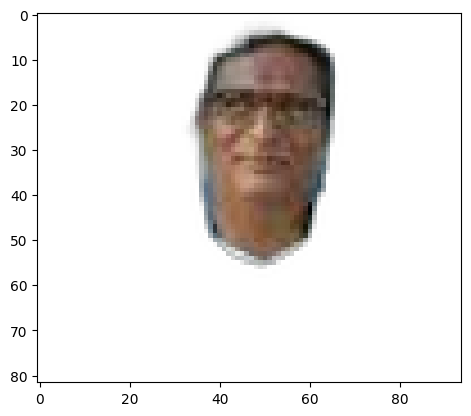

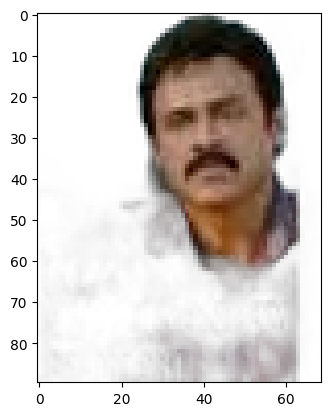

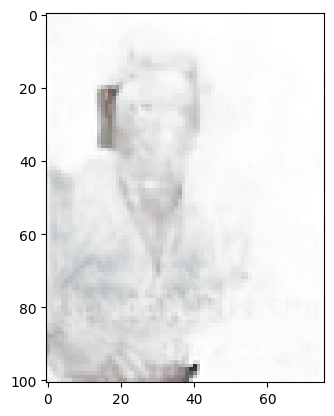

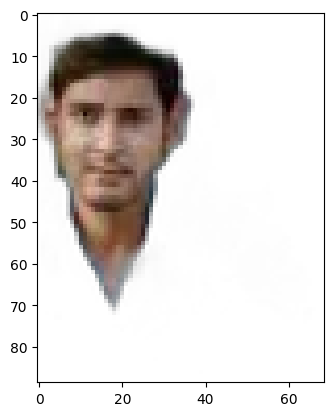

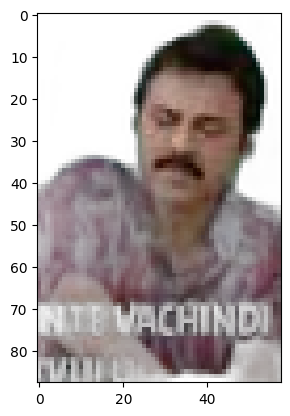

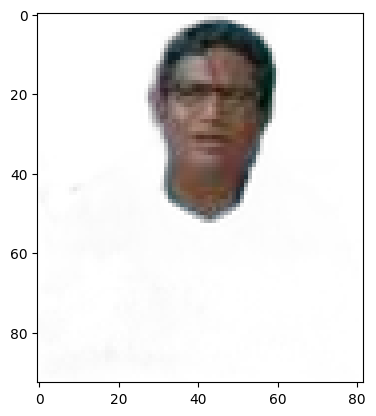

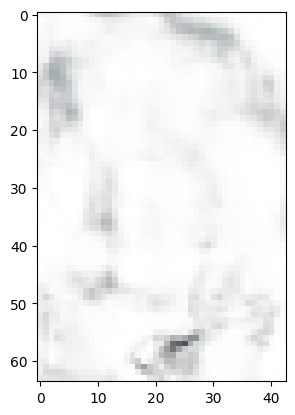

In [14]:
# Importing Required Modules
from rembg import remove
from PIL import Image


def remove_bg(input_img):
  # Removing the background from the given Image
  output = remove(input_img)
  plt.imshow(output)
  plt.show()


num_images = len(cropped_images)
print(num_images)
for i in range(num_images):
  remove_bg(cropped_images[i])